In [1]:
import numpy as np 
import pandas as pd 
import pickle

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
viz.get_style()

In [2]:
data_set = 'exp2'
models = ['rlPG_fea', 'caPG_fea', 'ecPG_fea']
method = 'map'
dpi = 300
to_pdf = True

/opt/anaconda3/envs/ecpg/lib/python3.10/site-packages/seaborn/utils.py:875: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if edgecolor == "face":


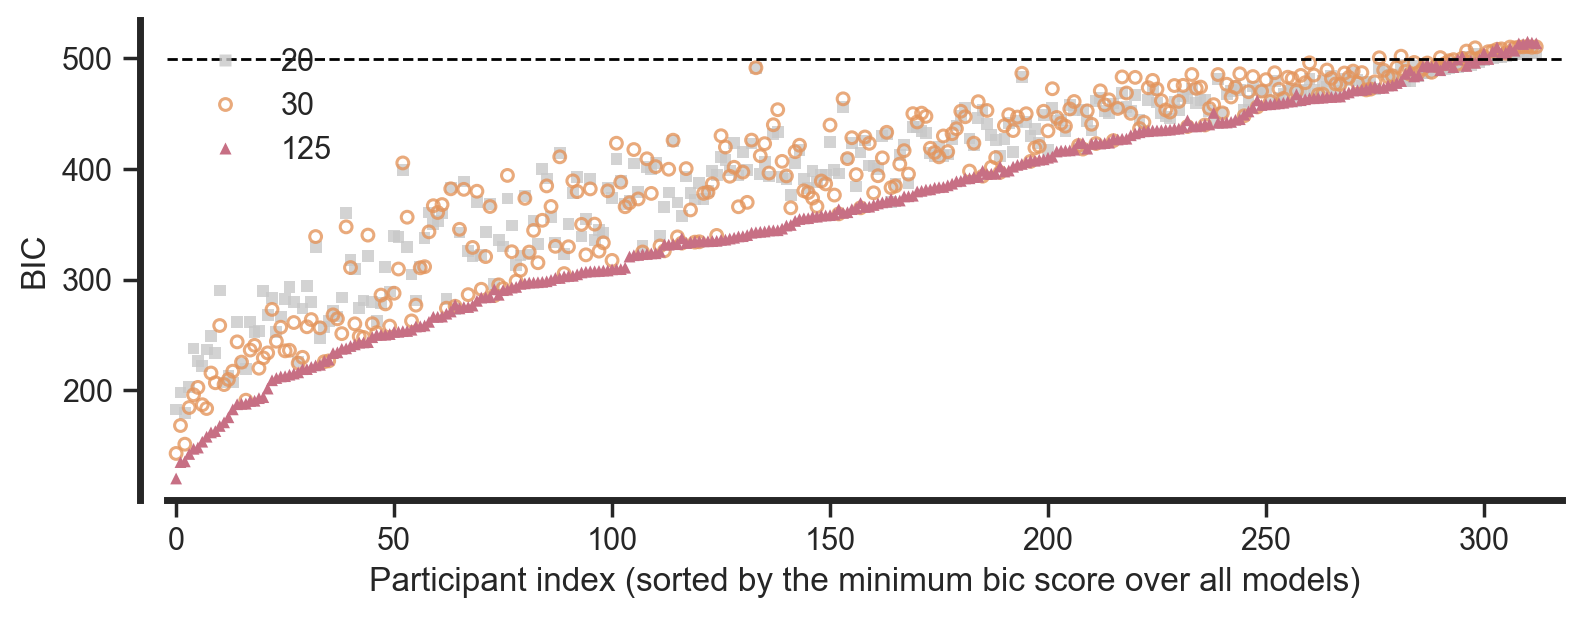

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3.12))
model_compare_per_participant(ax, data_set, models, 
                              method=method, cr='bic', 
                              n_data=3*(60+60))
if to_pdf: plt.savefig(f'../figures/{data_set}/Fig5A1_model_cmp.pdf', dpi=dpi)

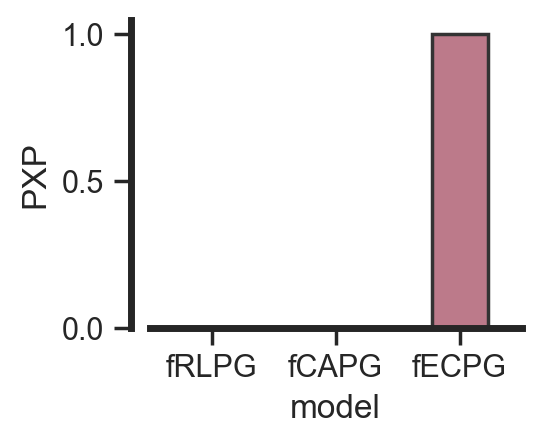

In [4]:
_, pxp = get_llh_score(data_set, models, method=method, 
                        if_bms=True, use_bic=True)
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.))
sns.barplot(y='pxp', x='model', data=pxp,
            hue='model', hue_order=models,
            edgecolor=[.2]*3, lw=1.25, width=.45,
            palette=[eval(m).color for m in models])
ax.spines['left'].set_position(('axes',-0.05))
for pos in ['bottom', 'left']: ax.spines[pos].set_linewidth(2.5)
ax.set_xticks(range(len(models)))
ax.set_xticklabels([eval(m).name for m in models])
ax.set_yticks([0, .5, 1.])
ax.set_ylabel('PXP')
if to_pdf: plt.savefig(f'../figures/{data_set}/Fig5B_pxp.pdf', dpi=dpi)


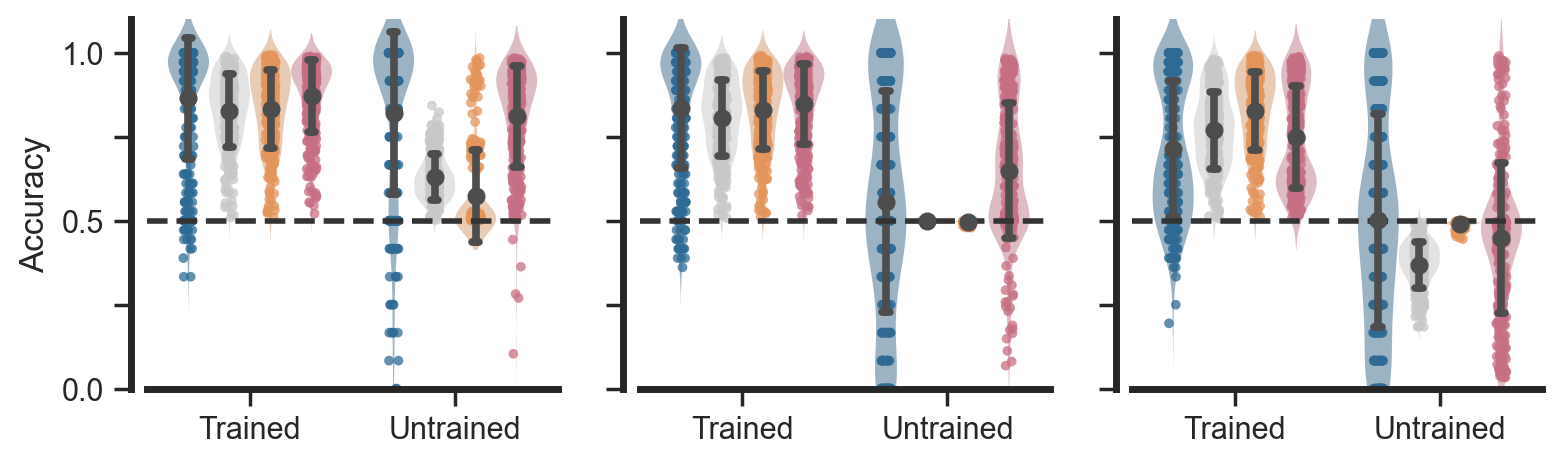

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
generalize_exp2(axs, 'exp2', ['human']+models, method=method)
for ax in axs: 
    ax.set_box_aspect(.9)
    ax.set_ylim([0, 1.1])
if to_pdf: plt.savefig(f'../figures/{data_set}/Fig5C_transfer_cond.pdf', dpi=dpi)